Importing the Libraries

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

from sklearn.cluster import DBSCAN 
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import normalize 
from sklearn.decomposition import PCA 

Uploading the Dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving CREDIT CARD.csv to CREDIT CARD.csv


Reading the Dataset

In [ ]:
X = pd.read_csv("CREDIT CARD.csv")
X

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


Cleaning the Dataset

In [ ]:
# Dropping the CUST_ID column from the data 
X = X.drop('CUST_ID', axis = 1) 
  
# Handling the missing values 
X.fillna(method ='ffill', inplace = True) 
  
X.head()

       BALANCE  BALANCE_FREQUENCY  ...  PRC_FULL_PAYMENT  TENURE
0    40.900749           0.818182  ...          0.000000      12
1  3202.467416           0.909091  ...          0.222222      12
2  2495.148862           1.000000  ...          0.000000      12
3  1666.670542           0.636364  ...          0.000000      12
4   817.714335           1.000000  ...          0.000000      12

[5 rows x 17 columns]


Preprocessing The dataset

In [ ]:
# Scaling the data to bring all the attributes to a comparable level 
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(X) 
  
# Normalizing the data so that  
# the data approximately follows a Gaussian distribution 
X_normalized = normalize(X_scaled) 
  
# Converting the numpy array into a pandas DataFrame 
X_normalized = pd.DataFrame(X_normalized) 

Principal component analysis

In [ ]:
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(X_normalized) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
X_principal.head() 

,P1,P2
0,-0.489949,-0.679976
1,-0.519099,0.544827
2,0.330633,0.268880
3,-0.481656,-0.097609
4,-0.563512,-0.482506


eps = 0.0375, min_samples = 3

In [ ]:
# Numpy array of all the cluster labels assigned to each data point 
db_default = DBSCAN(eps = 0.0375, min_samples = 3).fit(X_principal) 
labels = db_default.labels_ 
labels

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_

3

In [ ]:
# Building the label to colour mapping 
colours = {} 
colours[0] = 'r'
colours[1] = 'g'
colours[2] = 'b'
colours[-1] = 'k'

# Building the colour vector for each data point 
cvec = [colours[label] for label in labels] 

# For the construction of the legend of the plot 
r = plt.scatter(X_principal['P1'], X_principal['P2'], color ='r'); 
g = plt.scatter(X_principal['P1'], X_principal['P2'], color ='g'); 
b = plt.scatter(X_principal['P1'], X_principal['P2'], color ='b'); 
k = plt.scatter(X_principal['P1'], X_principal['P2'], color ='k'); 

# Plotting P1 on the X-Axis and P2 on the Y-Axis 
# according to the colour vector defined 
plt.figure(figsize =(9, 9)) 
#plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec) 

# Building the legend 
plt.legend((r, g, b, k), ('Label 0', 'Label 1', 'Label 2', 'Label -1')) 

plt.show() 


NameError: ignored

eps = 0.0375, min_samples = 50

In [ ]:
db = DBSCAN(eps = 0.0375, min_samples = 50).fit(X_principal) 
labels1 = db.labels_ 
labels1

array([-1, -1, -1, ..., -1, -1, -1])

In [ ]:
n_clusters_1 = len(set(labels1)) - (1 if -1 in labels1 else 0)
n_clusters_1

6

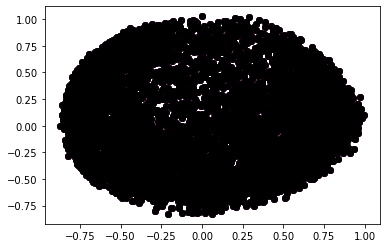

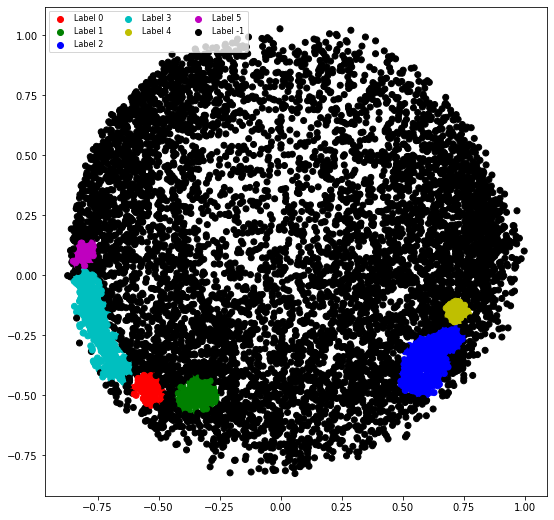

In [ ]:
colours1 = {} 
colours1[0] = 'r'
colours1[1] = 'g'
colours1[2] = 'b'
colours1[3] = 'c'
colours1[4] = 'y'
colours1[5] = 'm'
colours1[-1] = 'k'

cvec1 = [colours1[label] for label in labels1] 
colors = ['r', 'g', 'b', 'c', 'y', 'm', 'k' ] 

r1 = plt.scatter( 
		X_principal['P1'], X_principal['P2'], marker ='o', color = colours1[0]) 
g1 = plt.scatter( 
		X_principal['P1'], X_principal['P2'], marker ='o', color = colours1[1]) 
b1 = plt.scatter( 
		X_principal['P1'], X_principal['P2'], marker ='o', color = colours1[2]) 
c1 = plt.scatter( 
		X_principal['P1'], X_principal['P2'], marker ='o', color = colours1[3]) 
y1 = plt.scatter( 
		X_principal['P1'], X_principal['P2'], marker ='o', color = colours1[4]) 
m1 = plt.scatter( 
		X_principal['P1'], X_principal['P2'], marker ='o', color = colours1[5]) 
k1 = plt.scatter( 
        X_principal['P1'], X_principal['P2'], marker ='o', color = colours1[-1])

plt.figure(figsize =(9, 9)) 
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec1) 
plt.legend((r1, g1, b1, c1, y1, m1, k1), 
		('Label 0', 'Label 1', 'Label 2', 'Label 3 ', 'Label 4', 
			'Label 5', 'Label -1'), 
		scatterpoints = 1, 
		loc ='upper left', 
		ncol = 3, 
		fontsize = 8) 
plt.show() 



eps = 0.05, min_samples = 50

In [ ]:
db = DBSCAN(eps = 0.05, min_samples = 50).fit(X_principal) 
labels4 = db.labels_ 
labels4

array([-1, -1, -1, ..., -1, -1, -1])

In [ ]:
n_clusters_4 = len(set(labels4)) - (1 if -1 in labels4 else 0)
n_clusters_4

6

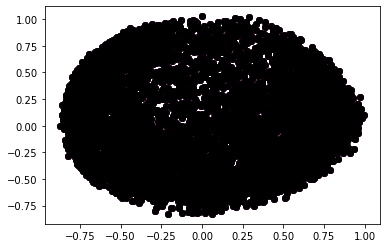

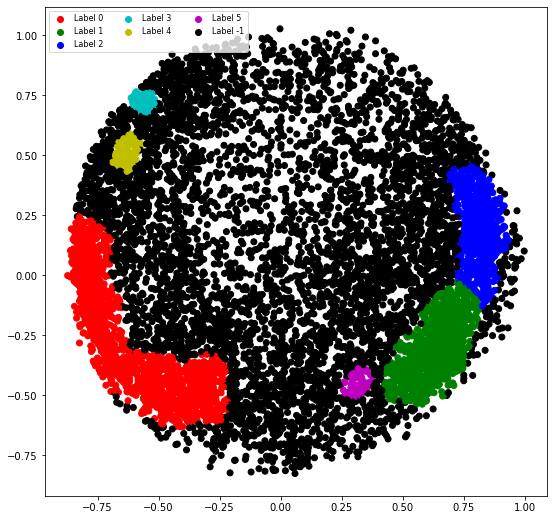

In [ ]:
colours4 = {} 
colours4[0] = 'r'
colours4[1] = 'g'
colours4[2] = 'b'
colours4[3] = 'c'
colours4[4] = 'y'
colours4[5] = 'm'
colours4[-1] = 'k'

cvec4 = [colours4[label] for label in labels4] 
colo4 = ['r', 'g', 'b', 'c', 'y', 'm', 'k' ] 

r4 = plt.scatter( 
		X_principal['P1'], X_principal['P2'], marker ='o', color = colours4[0]) 
g4 = plt.scatter( 
		X_principal['P1'], X_principal['P2'], marker ='o', color = colours4[1]) 
b4 = plt.scatter( 
		X_principal['P1'], X_principal['P2'], marker ='o', color = colours4[2]) 
c4 = plt.scatter( 
		X_principal['P1'], X_principal['P2'], marker ='o', color = colours4[3]) 
y4 = plt.scatter( 
		X_principal['P1'], X_principal['P2'], marker ='o', color = colours4[4]) 
m4 = plt.scatter( 
		X_principal['P1'], X_principal['P2'], marker ='o', color = colours4[5]) 
k4 = plt.scatter( 
        X_principal['P1'], X_principal['P2'], marker ='o', color = colours4[-1])

plt.figure(figsize =(9, 9)) 
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec4) 
plt.legend((r4, g4, b4, c4, y4, m4, k4), 
		('Label 0', 'Label 1', 'Label 2', 'Label 3 ', 'Label 4', 
			'Label 5', 'Label -1'), 
		scatterpoints = 1, 
		loc ='upper left', 
		ncol = 3, 
		fontsize = 8) 
plt.show() 

eps = 0.06, min_samples = 60

In [ ]:
db = DBSCAN(eps = 0.06, min_samples = 60).fit(X_principal) 
labels5 = db.labels_ 
labels5

array([-1, -1, -1, ..., -1,  4, -1])

In [ ]:
n_clusters_5 = len(set(labels5)) - (1 if -1 in labels5 else 0)
n_clusters_5

6

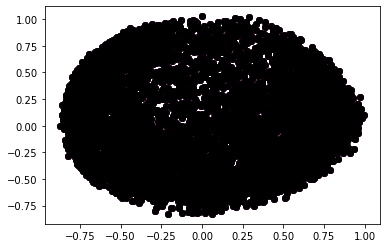

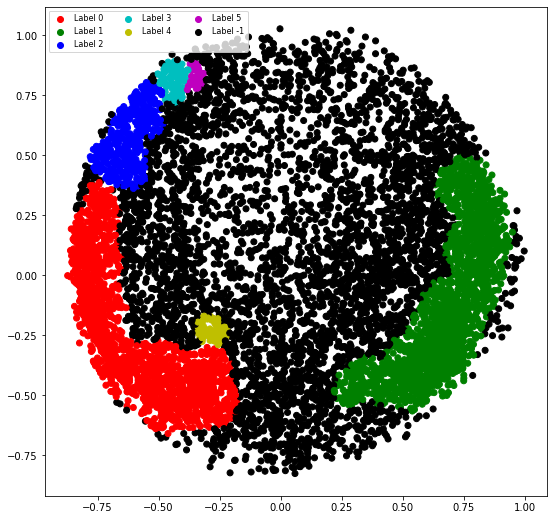

In [ ]:
colours5 = {} 
colours5[0] = 'r'
colours5[1] = 'g'
colours5[2] = 'b'
colours5[3] = 'c'
colours5[4] = 'y'
colours5[5] = 'm'
colours5[-1] = 'k'

cvec5 = [colours5[label] for label in labels5] 
colo5 = ['r', 'g', 'b', 'c', 'y', 'm', 'k' ] 

r5 = plt.scatter( 
		X_principal['P1'], X_principal['P2'], marker ='o', color = colours5[0]) 
g5 = plt.scatter( 
		X_principal['P1'], X_principal['P2'], marker ='o', color = colours5[1]) 
b5 = plt.scatter( 
		X_principal['P1'], X_principal['P2'], marker ='o', color = colours5[2]) 
c5 = plt.scatter( 
		X_principal['P1'], X_principal['P2'], marker ='o', color = colours5[3]) 
y5 = plt.scatter( 
		X_principal['P1'], X_principal['P2'], marker ='o', color = colours5[4]) 
m5 = plt.scatter(
		X_principal['P1'], X_principal['P2'], marker ='o', color = colours5[5]) 
k5 = plt.scatter( 
    X_principal['P1'], X_principal['P2'], marker ='o', color = colours5[-1])

plt.figure(figsize =(9, 9)) 
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec5) 
plt.legend((r5, g5, b5, c4, y5, m5, k5), 
		('Label 0', 'Label 1', 'Label 2', 'Label 3 ', 'Label 4', 
			'Label 5', 'Label -1'), 
		scatterpoints = 1, 
		loc ='upper left', 
		ncol = 3, 
		fontsize = 8) 
plt.show() 

eps = 0.06, min_samples = 65

In [ ]:
db = DBSCAN(eps = 0.06, min_samples = 65).fit(X_principal) 
labels6 = db.labels_ 
labels6

array([-1, -1, -1, ..., -1, -1, -1])

In [ ]:
n_clusters_6 = len(set(labels6)) - (1 if -1 in labels6 else 0)
n_clusters_6

6

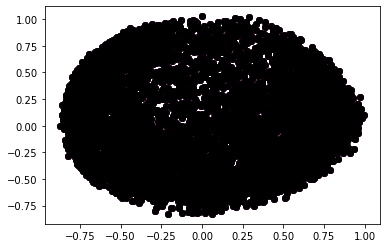

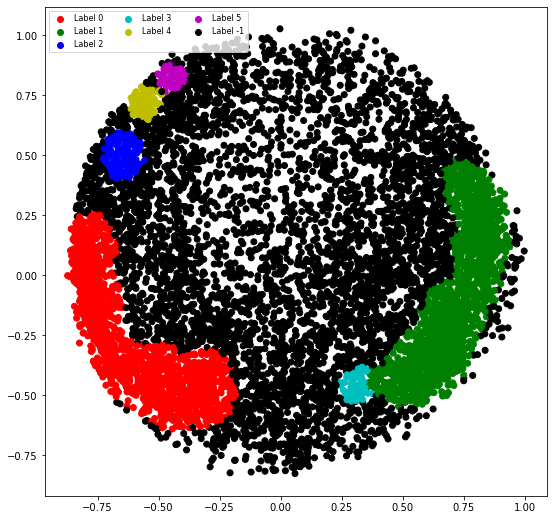

In [ ]:
colours6 = {} 
colours6[0] = 'r'
colours6[1] = 'g'
colours6[2] = 'b'
colours6[3] = 'c'
colours6[4] = 'y'
colours6[5] = 'm'
colours6[-1] = 'k'

cvec6 = [colours6[label] for label in labels6] 
colors6 = ['r', 'g', 'b', 'c', 'y', 'm', 'k' ] 

r6 = plt.scatter( 
		X_principal['P1'], X_principal['P2'], marker ='o', c = colours6[0]) 
g6 = plt.scatter( 
		X_principal['P1'], X_principal['P2'], marker ='o', c = colours6[1]) 
b6 = plt.scatter( 
		X_principal['P1'], X_principal['P2'], marker ='o', c = colours6[2]) 
c6 = plt.scatter( 
		X_principal['P1'], X_principal['P2'], marker ='o', c = colours6[3]) 
y6 = plt.scatter( 
		X_principal['P1'], X_principal['P2'], marker ='o', c = colours6[4]) 
m6 = plt.scatter( 
		X_principal['P1'], X_principal['P2'], marker ='o', c = colours6[5]) 
k6 = plt.scatter( 
    X_principal['P1'], X_principal['P2'], marker ='o', c = colours6[-1])

plt.figure(figsize =(9, 9)) 
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec6) 
plt.legend((r6, g6, b6, c6, y6, m6, k6), 
		('Label 0', 'Label 1', 'Label 2', 'Label 3 ', 'Label 4', 
			'Label 5', 'Label -1'), 
		scatterpoints = 1, 
		loc ='upper left', 
		ncol = 3, 
		fontsize = 8) 
plt.show() 

eps = 0.065 min_samples = 65

In [ ]:
db = DBSCAN(eps = 0.065, min_samples = 65).fit(X_principal) 
labels7 = db.labels_ 
labels7

array([-1,  0, -1, ..., -1,  2, -1])

In [ ]:
n_clusters_7 = len(set(labels7)) - (1 if -1 in labels7 else 0)
n_clusters_7

3

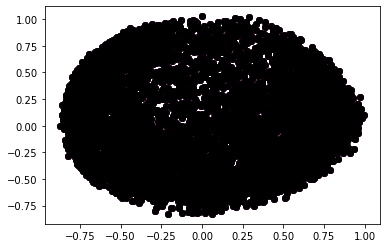

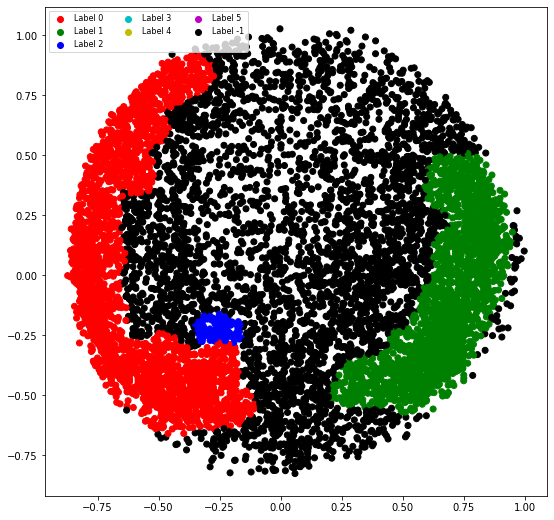

In [ ]:
colours7 = {} 
colours7[0] = 'r'
colours7[1] = 'g'
colours7[2] = 'b'
colours7[3] = 'c'
colours7[4] = 'y'
colours7[5] = 'm'
colours7[-1] = 'k'

cvec7 = [colours7[label] for label in labels7] 
colors7 = ['r', 'g', 'b', 'c', 'y', 'm', 'k' ] 

r7 = plt.scatter( 
		X_principal['P1'], X_principal['P2'], marker ='o', c = colours7[0]) 
g7 = plt.scatter( 
		X_principal['P1'], X_principal['P2'], marker ='o', c = colours7[1]) 
b7 = plt.scatter( 
		X_principal['P1'], X_principal['P2'], marker ='o', c = colours7[2]) 
c7 = plt.scatter( 
		X_principal['P1'], X_principal['P2'], marker ='o', c = colours7[3]) 
y7 = plt.scatter( 
		X_principal['P1'], X_principal['P2'], marker ='o', c = colours7[4]) 
m7 = plt.scatter( 
		X_principal['P1'], X_principal['P2'], marker ='o', c = colours7[5]) 
k7 = plt.scatter( 
    X_principal['P1'], X_principal['P2'], marker ='o', c = colours7[-1])

plt.figure(figsize =(9, 9)) 
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec7) 
plt.legend((r7, g7, b7, c7, y7, m7, k7), 
		('Label 0', 'Label 1', 'Label 2', 'Label 3 ', 'Label 4', 
			'Label 5', 'Label -1'), 
		scatterpoints = 1, 
		loc ='upper left', 
		ncol = 3, 
		fontsize = 8) 
plt.show() 

eps = 0.06 min_samples = 60 

In [ ]:
db = DBSCAN(eps = 0.06, min_samples = 60).fit(X_principal) 
labels2 = db.labels_ 
labels2

In [ ]:
n_clusters_2 = len(set(labels2)) - (1 if -1 in labels2 else 0)
n_clusters_2

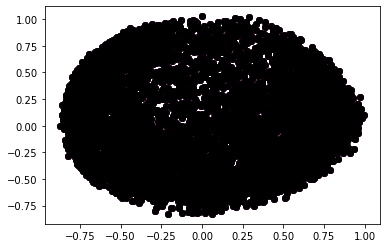

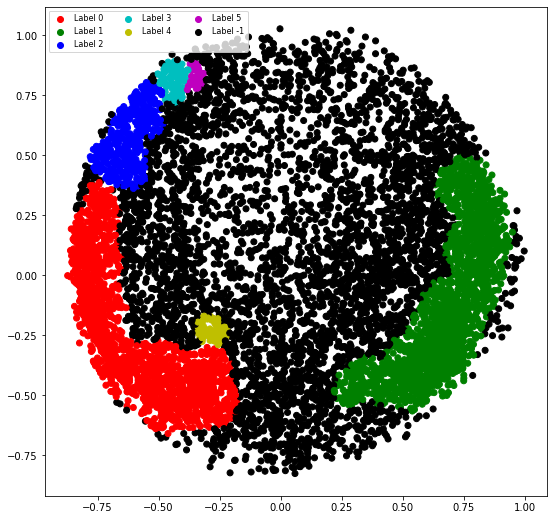

In [ ]:
colours2 = {} 
colours2[0] = 'r'
colours2[1] = 'g'
colours2[2] = 'b'
colours2[3] = 'c'
colours2[4] = 'y'
colours2[5] = 'm'
#colours2[6] = 'br'
colours2[-1] = 'k'

cvec2 = [colours2[label] for label in labels2] 
colors1 = ['r', 'g', 'b', 'c', 'y', 'm', 'k' ] 

r2 = plt.scatter( 
		X_principal['P1'], X_principal['P2'], marker ='o', c = colours2[0]) 
g2 = plt.scatter( 
		X_principal['P1'], X_principal['P2'], marker ='o', c = colours2[1]) 
b2 = plt.scatter( 
		X_principal['P1'], X_principal['P2'], marker ='o', c = colours2[2]) 
c2 = plt.scatter( 
		X_principal['P1'], X_principal['P2'], marker ='o', c = colours2[3]) 
y2 = plt.scatter( 
		X_principal['P1'], X_principal['P2'], marker ='o', c = colours2[4]) 
m2 = plt.scatter( 
		X_principal['P1'], X_principal['P2'], marker ='o', c = colours2[5]) 
k2 = plt.scatter( 
        X_principal['P1'], X_principal['P2'], marker ='o', c = colours2[-1])

plt.figure(figsize =(9, 9)) 
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec2) 
plt.legend((r2, g2, b2, c2, y2, m2, k2), 
		('Label 0', 'Label 1', 'Label 2', 'Label 3 ', 'Label 4', 
			'Label 5', 'Label -1'), 
		scatterpoints = 1, 
		loc ='upper left', 
		ncol = 3, 
		fontsize = 8) 
plt.show() 

eps = -0.082 min_samples = 62 

In [ ]:
db = DBSCAN(eps = 0.082, min_samples = 62).fit(X_principal) 
labels3 = db.labels_ 
labels3

array([ 0,  0,  1, ...,  0,  0, -1])

In [ ]:
n_clusters_3 = len(set(labels3)) - (1 if -1 in labels3 else 0)
n_clusters_3

2

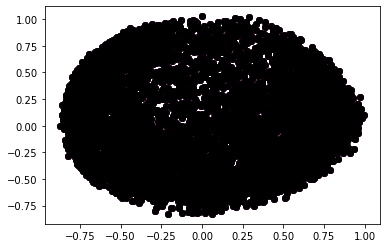

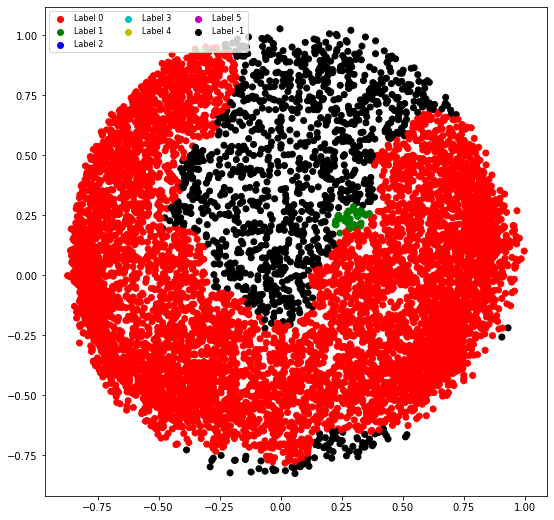

In [ ]:
colours3 = {} 
colours3[0] = 'r'
colours3[1] = 'g'
colours3[2] = 'b'
colours3[3] = 'c'
colours3[4] = 'y'
colours3[5] = 'm'
colours3[-1] = 'k'

cvec3 = [colours3[label] for label in labels3] 
colors3 = ['r', 'g', 'b', 'c', 'y', 'm', 'k' ] 

r3 = plt.scatter( 
		X_principal['P1'], X_principal['P2'], marker ='o', c = colours3[0]) 
g3 = plt.scatter( 
		X_principal['P1'], X_principal['P2'], marker ='o', c = colours3[1]) 
b3 = plt.scatter( 
		X_principal['P1'], X_principal['P2'], marker ='o', c = colours3[2]) 
c3 = plt.scatter( 
		X_principal['P1'], X_principal['P2'], marker ='o', c = colours3[3]) 
y3 = plt.scatter( 
		X_principal['P1'], X_principal['P2'], marker ='o', c = colours3[4]) 
m3 = plt.scatter( 
		X_principal['P1'], X_principal['P2'], marker ='o', c = colours3[5]) 
k3 = plt.scatter( 
    X_principal['P1'], X_principal['P2'], marker ='o', c = colours3[-1])

plt.figure(figsize =(9, 9)) 
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec3) 
plt.legend((r3, g3, b3, c3, y3, m3, k3), 
		('Label 0', 'Label 1', 'Label 2', 'Label 3 ', 'Label 4', 
			'Label 5', 'Label -1'), 
		scatterpoints = 1, 
		loc ='upper left', 
		ncol = 3, 
		fontsize = 8) 
plt.show() 